In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import seaborn as sns

import linear_model
from matplotlib.colors import LogNorm

np.set_printoptions(suppress=True)
DATETIME_FORMAT = "%Y%m%dT000000"

retrieve dataframe from csv:

In [3]:
df = linear_model.load_data('kc_house_data.csv')

In [4]:
df

,intercept,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated_1930,yr_renovated_1940,yr_renovated_1950,yr_renovated_1960,yr_renovated_1970,yr_renovated_1980,yr_renovated_1990,yr_renovated_2000,yr_renovated_2010,yr_renovated_2020
0,1.0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,538000.0,3,2.25,2570,7242,2.0,0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,180000.0,2,1.00,770,10000,1.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,604000.0,4,3.00,1960,5000,1.0,0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,510000.0,3,2.00,1680,8080,1.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,1.0,360000.0,3,2.50,1530,1131,3.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
21612,1.0,400000.0,4,2.50,2310,5813,2.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
21613,1.0,402101.0,2,0.75,1020,1350,2.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
21614,1.0,400000.0,3,2.50,1600,2388,2.0,0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
new_df = pd.DataFrame({'lat': df['lat'], 'long': df['long'], 'location': list(zip(df['lat'], df['long'])), 'price': df['price']})
new_df = new_df.groupby(['location']).mean()
new_df

,lat,long,price
location,,,
"(47.15, -121.95)",47.15,-121.95,590666.666667
"(47.15, -121.65)",47.15,-121.65,380000.000000
"(47.2, -122.05)",47.20,-122.05,413394.000000
"(47.2, -122.0)",47.20,-122.00,269582.000000
"(47.2, -121.95)",47.20,-121.95,321230.000000
...,...,...,...
"(47.8, -122.25)",47.80,-122.25,398819.500000
"(47.8, -122.2)",47.80,-122.20,418812.500000
"(47.8, -122.15)",47.80,-122.15,558758.888889


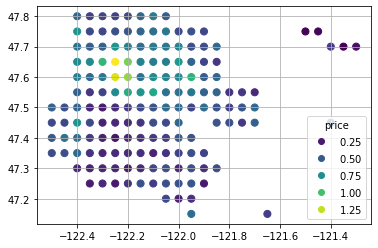

In [45]:
fig, ax = plt.subplots()
scatter = ax.scatter(new_df['long'], new_df['lat'], c=new_df['price'], marker='.', s=200)
ax.legend(*scatter.legend_elements(num=5), title="price")
ax.grid()
# plt.show()

In [46]:
df['sqft_basement'] = pd.cut(df['sqft_basement'], [-1, 1, 5000], duplicates='drop')
df['sqft_basement'] = df['sqft_basement'].astype(str)
df = pd.get_dummies(df, columns=['sqft_basement'])

,base,price
base,1.000000,0.184077
price,0.184077,1.000000


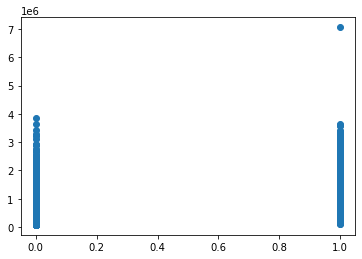

In [47]:
base = df.loc[:,df.columns.str.contains('sqft_basement')]['sqft_basement_(1, 5000]']
plt.scatter(base, df['price'])

dddd = pd.DataFrame({'base': base, 'price': df['price']})
dddd.corr()

In [48]:
df['grade'].value_counts()
# df['grade'].plot(kind='box')

7.0     8977
8.0     6064
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
4.0       29
3.0        3
1.0        1
Name: grade, dtype: int64

In [ ]:
# correlation of X and y
df.corr()['price'][1:].abs().sort_values(ascending=False)

In [ ]:
X = df.drop(['price'], axis=1).to_numpy()
y = df['price'].to_numpy()

In [ ]:
np.cov(X, y, rowvar=False)[-1, :-1] / np.sqrt(np.var(y, ddof=1) * np.var(X, axis=0, ddof=1))


## preprocessing
___



### find correlation between features

In [ ]:
corr = df.drop(['id', 'price'], axis=1).corr().abs()
# (corr > 0.8)
corr


In [ ]:
df['sqft_basement'].corr(df['sqft_living'])
df['sqft_living'].corr(df['sqft_basement'])


In [ ]:
X = df.drop(['id', 'date', 'price'], axis=1).to_numpy()
Y = df['price'].to_numpy()

In [ ]:
print(X)
print(Y)

### check for data validity

In [ ]:
U, Sigma, V = np.linalg.svd(X)

In [ ]:
XTX = X.T @ X
Ut, Sigmat, Vt = np.linalg.svd(XTX)

In [ ]:
epsilon = 0.0001
Sigma[Sigma < epsilon] = 0
print(np.where(np.array(Sigma) > 0))
Sigma

In [ ]:
Sigmat = np.array(Sigmat)
np.where(Sigmat < epsilon)

In [ ]:
epsilon = 0.0001
training_errors = []
test_errors = []

for i in range(1,100):
    # create test/train split
    train = df.sample(frac=(i/100),random_state=200) #random state is a seed value
    test = df.drop(train.index)

    # train the model
    x = train.drop(['id', 'date', 'price'], axis=1).to_numpy()
    y = train['price'].to_numpy()

    # find the best weights
    u, s, v = np.linalg.svd(x)
    s[s < epsilon] = 0
    s_inv = la.diagsvd(np.reciprocal(s, where=(s != 0)), *x.shape).T
    w = v.T @ s_inv @ u.T @ y

    # calculate the rss over training dataset
    rss_train = np.linalg.norm(np.dot(x, w)-y)**2
    training_errors.append(rss_train)

    # calculate the rss over test dataset
    x = test.drop(['id', 'date', 'price'], axis=1).to_numpy()
    y = test['price'].to_numpy()
    rss_test = np.linalg.norm(np.dot(x, w)-y)**2
    test_errors.append(rss_test)

In [ ]:
percentage = np.arange(1, 100)
plt.scatter(percentage, training_errors, label='train-error')
plt.scatter(percentage, test_errors, label='test-error')
plt.legend()
plt.title("errors by training/test split")
plt.xlabel("training set size (%)")
plt.ylabel("rss (1e15")
plt.show()